In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_precios = pd.read_csv('Modelo_Precios_Met_Fest.csv', delimiter=';')

In [3]:
# Dimensiones del DataFrame (número de filas y columnas)
print(df_precios.shape)

(193500, 15)


In [4]:
# Información general sobre las columnas y tipos de datos
print(df_precios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193500 entries, 0 to 193499
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   FECHA                               193500 non-null  object 
 1   Provincia                           193500 non-null  object 
 2   ALTITUD                             193500 non-null  float64
 3   TMEDIA                              193500 non-null  float64
 4   TMIN                                193500 non-null  float64
 5   TMAX                                193500 non-null  float64
 6   DIR                                 193500 non-null  float64
 7   VELMEDIA                            193500 non-null  float64
 8   RACHA                               193500 non-null  float64
 9   SOL                                 193094 non-null  float64
 10  PRESMAX                             193423 non-null  float64
 11  PRESMIN                   

En nuestros datos, que se encuentran almacenados en un archivo CSV con 193,500 filas y 15 columnas, contamos con un conjunto completo sin valores nulos en ninguna de las columnas. Este dataset incluye tanto variables numéricas, como la altitud (ALTITUD), temperatura media (TMEDIA) y el precio total con impuestos (€/MWh), como variables categóricas, tales como la provincia (Provincia), los días festivos (Festivo) y si los datos corresponden a entre semana (Entre semana). La cantidad de registros y la variedad de variables presentes en el archivo proporcionan una base robusta para explorar tendencias, relaciones y patrones, con datos listos para realizar análisis estadísticos y categóricos sin necesidad de limpieza adicional.

In [5]:
# Estadísticas para columnas numéricas
print(df_precios.describe())

             ALTITUD         TMEDIA           TMIN           TMAX  \
count  193500.000000  193500.000000  193500.000000  193500.000000   
mean      561.597385      15.275664       9.539770      21.011785   
std       283.538886       6.770495       6.233878       7.842225   
min        77.600000      -6.046154     -13.787500      -2.038462   
25%       294.928571      10.071429       4.900000      14.994934   
50%       538.600000      15.112500       9.636364      20.636364   
75%       821.000000      20.428571      14.264746      26.900000   
max      1229.470588      35.225000      26.825000      45.535714   

                 DIR       VELMEDIA          RACHA            SOL  \
count  193500.000000  193500.000000  193500.000000  193094.000000   
mean       25.400534       2.713923       9.640218       7.398845   
std         8.342243       1.211929       3.158272       3.937336   
min         1.833333       0.329412       2.500000       0.000000   
25%        20.071429       1.8642

En nuestros datos, observamos que la altitud promedio es de 561.6 metros, con valores que oscilan entre 77.6 y 1229.5 metros. Las temperaturas registran una media de 15.3°C, con extremos que van desde -13.8°C hasta 41.7°C, reflejando una gran variabilidad climática. Las horas de sol tienen un promedio de 7.4 horas diarias, alcanzando un máximo de 14.7 horas. La velocidad media del viento es relativamente baja, con 2.7 m/s en promedio, pero se registran ráfagas que alcanzan hasta 31.6 m/s, lo que sugiere eventos de viento significativos. Por otro lado, los precios de la energía presentan una media de 125.6 €/MWh, con una dispersión notable, desde un mínimo de 2.2 €/MWh hasta un máximo de 989.8 €/MWh. Estos resultados reflejan una alta variabilidad tanto en las condiciones climáticas como en los costos energéticos, destacando la importancia de explorar posibles patrones y factores asociados.

In [6]:
# Valores únicos en columnas categóricas
print(df_precios['Provincia'].unique())

['A CORUÑA' 'ALAVA' 'ALBACETE' 'ALICANTE' 'ALMERIA' 'ASTURIAS' 'AVILA'
 'BADAJOZ' 'BARCELONA' 'BIZKAIA' 'BURGOS' 'CACERES' 'CADIZ' 'CANTABRIA'
 'CASTELLON' 'CIUDAD REAL' 'CORDOBA' 'CUENCA' 'GIPUZKOA' 'GIRONA'
 'GRANADA' 'GUADALAJARA' 'HUELVA' 'HUESCA' 'ILLES BALEARS' 'JAEN'
 'LA RIOJA' 'LAS PALMAS' 'LEON' 'LLEIDA' 'LUGO' 'MADRID' 'MALAGA' 'MURCIA'
 'NAVARRA' 'OURENSE' 'PALENCIA' 'PONTEVEDRA' 'SALAMANCA'
 'SANTA CRUZ DE TENERIFE' 'SEGOVIA' 'SEVILLA' 'SORIA' 'TARRAGONA' 'TERUEL'
 'TOLEDO' 'VALENCIA' 'VALLADOLID' 'ZAMORA' 'ZARAGOZA']


En nuestros datos, la columna "Provincia" contiene un total de 50 valores únicos, que representan diferentes provincias de España. Estos valores incluyen tanto regiones de la península como áreas insulares, como "Illes Balears" y "Santa Cruz de Tenerife".

In [7]:
# Conteo de valores en columnas categóricas
print(df_precios['Festivo'].value_counts())

Festivo
NO    188768
SI      4732
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


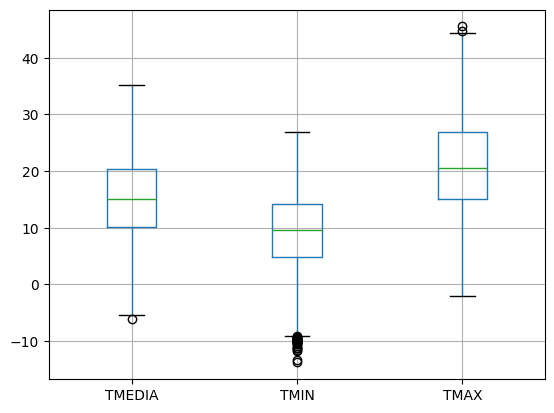

In [8]:
# Inspeccionar columnas numéricas para valores extremos
print(df_precios[['TMEDIA', 'TMIN', 'TMAX']].boxplot())

En nuestros datos, el diagrama de caja (boxplot) de las temperaturas (TMEDIA, TMIN, TMAX) permite identificar la distribución y posibles valores atípicos. Observamos lo siguiente:

Temperatura Media (TMEDIA): La mayoría de los valores se concentran entre aproximadamente 10°C y 20°C, con algunos valores que se acercan a los extremos superiores (~30°C). No se detectan valores atípicos significativos en esta variable.

Temperatura Mínima (TMIN): Existen varios valores atípicos en los extremos inferiores, con temperaturas que descienden por debajo de -10°C. Esto podría corresponder a condiciones climáticas extremas o requerir verificación para descartar errores de medición.

Temperatura Máxima (TMAX): Se identifican algunos valores atípicos en los extremos superiores, con temperaturas que superan los 40°C. Esto podría estar asociado a episodios de calor extremo o registros anómalos.

En general, el boxplot nos muestra que las temperaturas tienen una distribución razonablemente esperada, pero algunos valores extremos merecen un análisis adicional para confirmar su validez. Estos valores extremos podrían influir significativamente en los promedios y otros análisis estadísticos.

<Figure size 1000x800 with 0 Axes>

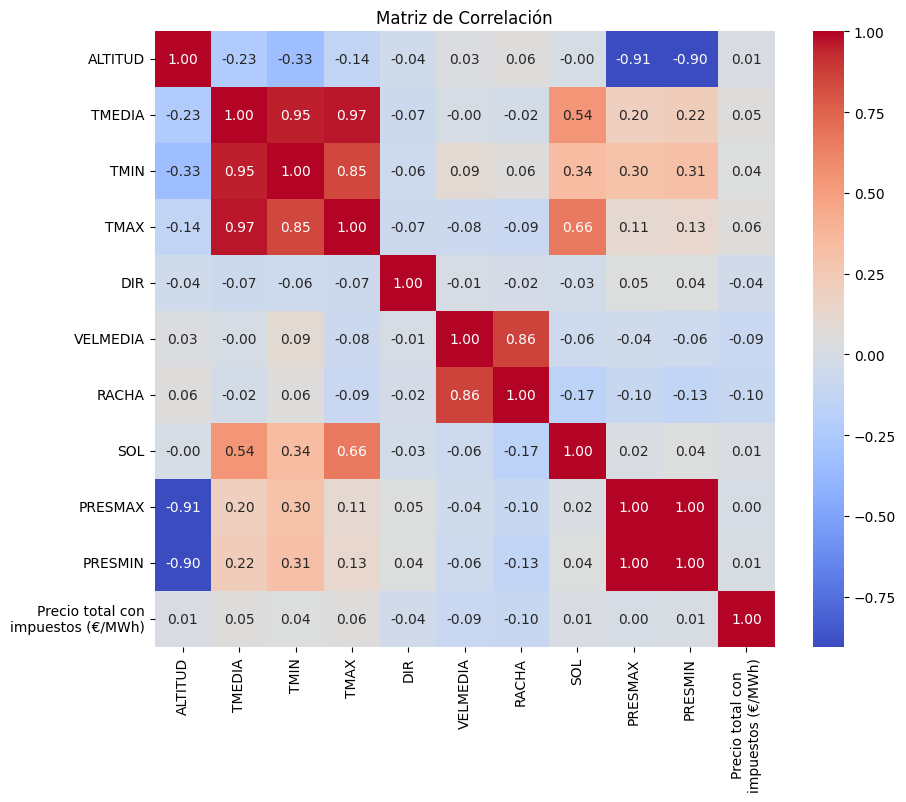

In [10]:
# Renombrar la columna para dividir el texto en dos líneas
df_precios_renamed = df_precios.rename(columns={
    "Precio total con impuestos (€/MWh)": "Precio total con\nimpuestos (€/MWh)"
})

# Seleccionar solo las columnas numéricas
df_numerico = df_precios_renamed.select_dtypes(include=['number'])

# Crear la matriz de correlación y graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Título del gráfico
plt.title("Matriz de Correlación")
plt.show()

El análisis de la matriz de correlación resalta relaciones importantes entre las variables. Las temperaturas media (TMEDIA), máxima (TMAX) y mínima (TMIN) están fuertemente correlacionadas, mientras que las horas de sol (SOL) tienen una relación moderada con las temperaturas, sugiriendo que días más soleados tienden a ser más cálidos. La presión atmosférica (PRESMAX y PRESMIN) muestra una fuerte relación negativa con la altitud (-0.91), consistente con el comportamiento físico esperado, y VELMEDIA está altamente correlacionada con las ráfagas (RACHA, 0.86), indicando que días con vientos más fuertes tienen ráfagas más intensas.

En cambio, no se encuentran correlaciones significativas entre los precios de la energía y las variables climáticas o geográficas, lo que sugiere que factores externos, como dinámicas del mercado o la demanda, son determinantes en los costos energéticos. Este análisis subraya la importancia de explorar variables adicionales para comprender mejor las fluctuaciones de precios.

In [11]:
# Extraer información temporal sin convertir a datetime
df_precios['Año'] = df_precios['FECHA'].str[:4]  # Primeros 4 caracteres para el año
df_precios['Mes'] = df_precios['FECHA'].str[5:7]  # Caracteres 5 a 7 para el mes

# Convertir las columnas a tipo numérico (opcional, para cálculos posteriores)
df_precios['Año'] = df_precios['Año'].astype(int)
df_precios['Mes'] = df_precios['Mes'].astype(int)

# Análisis de tendencia por año
tendencia_anual = df_precios.groupby('Año')['Precio total con impuestos (€/MWh)'].mean()

# Mostrar resultados
print(tendencia_anual)

Año
2014     69.861236
2015     75.132682
2016     59.265443
2017     78.422648
2018     85.276382
2019     71.275373
2020     50.711641
2021    196.080783
2022    365.406291
2023    186.715096
2024    142.247267
Name: Precio total con impuestos (€/MWh), dtype: float64


En este análisis se extrae el año y el mes de la columna FECHA para calcular el promedio anual del precio total con impuestos (€/MWh). Los resultados muestran un aumento progresivo de los precios desde 2014, con incrementos significativos a partir de 2021, reflejando posibles factores externos como crisis de suministro o aumentos en la demanda. Aunque en 2024 los precios parecen estabilizarse ligeramente, se mantienen mucho más altos que en los primeros años.

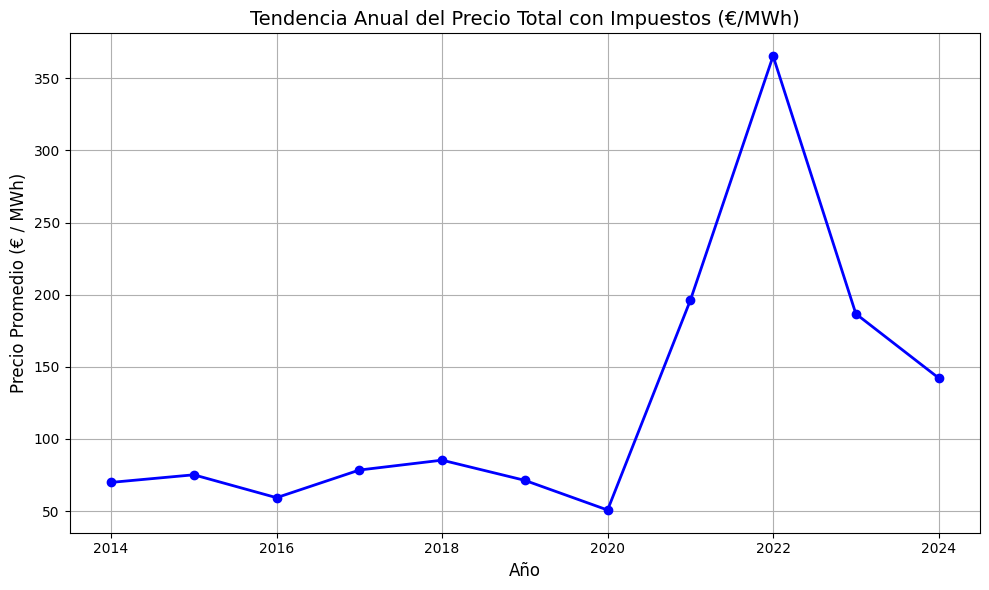

In [12]:
# Extraer el año de la columna 'FECHA' sin convertirla a datetime
df_precios['Año'] = df_precios['FECHA'].str[:4]  # Los primeros 4 caracteres representan el año

# Agrupar por año y calcular el promedio del precio
df_anual = df_precios.groupby('Año')['Precio total con impuestos (€/MWh)'].mean()

# Graficar la tendencia anual
plt.figure(figsize=(10, 6))
df_anual.plot(kind='line', marker='o', color='blue', linewidth=2)

# Configurar título y etiquetas
plt.title('Tendencia Anual del Precio Total con Impuestos (€/MWh)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio Promedio (€ / MWh)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En nuestros datos, en los primeros años, los precios se mantuvieron relativamente estables, fluctuando ligeramente alrededor de los 50-100 €/MWh. Sin embargo, a partir de 2021, se observa un aumento drástico, alcanzando un pico significativo en 2022 con un promedio superior a 350 €/MWh. Esto refleja un cambio notable en el mercado energético, posiblemente asociado a crisis de suministro, aumentos en la demanda o cambios regulatorios.

En 2023 y 2024, los precios muestran una ligera disminución en comparación con 2022, pero permanecen altos en relación con los años anteriores a 2021

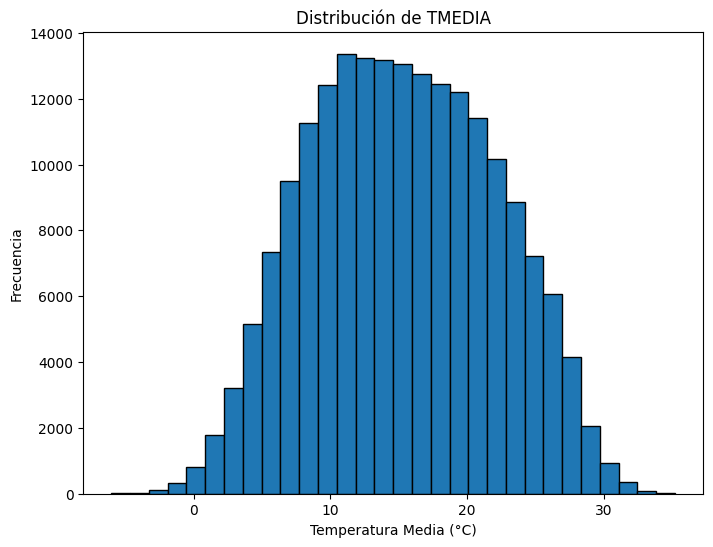

In [13]:
# Histograma para la distribución de valores numéricos
plt.figure(figsize=(8, 6))
plt.hist(df_precios['TMEDIA'], bins=30, edgecolor='black')  # edgecolor agrega las líneas entre las barras
plt.title('Distribución de TMEDIA')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Frecuencia')
plt.show()

En nuestros datos la distribución tiene una forma aproximadamente simétrica y sigue un patrón cercano al de una campana, lo que sugiere una distribución normal.

La mayor parte de las observaciones se concentra entre los 10°C y 20°C, lo que indica que estas son las temperaturas promedio más comunes en las regiones analizadas. Los valores extremos, tanto por debajo de 0°C como por encima de 30°C, son menos frecuentes, reflejando condiciones climáticas menos comunes o específicas de ciertas épocas del año o regiones.